In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
#from gensim.models import Word2Vec

In [2]:
df = pd.read_csv('../Data/dontpatronizeme_pcl.tsv', sep = '\t', names=['id','info','country', 'text','class'] )


In [17]:
#df.head()

<AxesSubplot:xlabel='class', ylabel='count'>

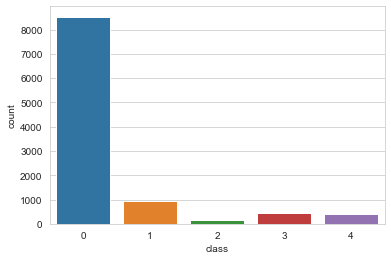

In [3]:
sns.set_style('whitegrid')
sns.countplot(x='class',data= df)

In [4]:
df['class'].value_counts()

0    8529
1     947
3     458
4     391
2     144
Name: class, dtype: int64

In [19]:
#sns.set_style('whitegrid')
#sns.countplot(x='info',data= df, linewidth= 5)

In [20]:
#sns.set_style('whitegrid')
#sns.countplot(x='class',hue='country',data=df,palette='RdBu_r')

In [21]:
#sns.set_style('whitegrid')
#sns.countplot(x='class',hue='info',data=df,palette='rainbow')

In [3]:
print(df['text'].count())
print(df['info'].count())

10468
10469


In [4]:
df = df.dropna(inplace = False)

In [5]:
df = df.reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       10468 non-null  object
 1   info     10468 non-null  object
 2   country  10468 non-null  object
 3   text     10468 non-null  object
 4   class    10468 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 409.0+ KB


In [6]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to C:\Users\Preetam
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
corpus =[]
from tqdm import tqdm 
for i in tqdm(range(0,10468)):
    
    review = re.sub('[^a-zA-Z]',' ', df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set (all_stopwords)]
    review =' '.join(review)
    corpus.append(review)
    

100%|██████████████████████████████████████████████████████████████████████████| 10468/10468 [00:05<00:00, 1992.18it/s]


In [7]:
#corpus

In [77]:
#cf = [i for i in range(50,1000,50)]
#ac = []

#for i in cf:
  #  cv = CountVectorizer( max_features = i)
    
   # X = cv.fit_transform(corpus).toarray()
   # y = df.iloc[:,-1].values
    
   # X_train, X_test, y_train_task1, y_test_task1 = train_test_split(X, y, test_size = 0.20, random_state= 0)
    
   # classifier = GaussianNB()
   # classifier = MultinomialNB()
   # classifier.fit (X_train, y_train_task1)
    
   # y_pred = classifier.predict(X_test)
   # print(f'feature count {i}, {accuracy_score(y_test_task1, y_pred)}')
  #  ac.append([i,accuracy_score(y_test_task1, y_pred)])
    

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(min_df=1,stop_words='english')
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values

In [9]:
y

array([0, 0, 0, ..., 3, 4, 3], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)
    
   

In [10]:
y_train_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_train ]
y_test_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_test ]

In [11]:
#from sklearn.linear_model import LogisticRegression
#logmodel = LogisticRegression(max_iter=800)
#logmodel.fit(X_train, y_train)

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
#classifier = MultinomialNB()
classifier = GaussianNB() 
classifier.fit(X_train, y_train_task1)

GaussianNB()

In [14]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_task1, y_pred)
print(cm)



[[1604  286]
 [ 164   40]]


In [15]:
accuracy_score(y_test_task1, y_pred)

0.7851002865329513

TF- IDF


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test_task1, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1890
           1       0.12      0.20      0.15       204

    accuracy                           0.79      2094
   macro avg       0.51      0.52      0.51      2094
weighted avg       0.83      0.79      0.81      2094



|Models|Description|Precion|Recall|weighted average F1|Accuracy F1|Remark|
|---|---|---|---|---|---|---|
|MultinomialNB|TFIDF Feature|.81|.90|.86|90|No inference for class 1 i.e class 2,3,4. CM - (1,2)0 & (2,2) 0|
|GaussianNB|TFIDF Feature|.83|.79|.81|79|Higher biased towards 0,|
|GaussianNB|CV Feature|.87|.53|.62|53|CLASS 0 HIGLY BIASED RESULT DERIVED MORE FROM CLASS 0 & 1|
|MultinomialNB|CV Feature|.87|.87|.87|.87|1. overall accc,pre,re is stable throughout.2.class 2 doesn,t given any weightage|
|GaussianNB|Gensim word2vec||||||

In [96]:
len(cv.get_feature_names())


20244

In [78]:
#X_train.inverse_transform(X_train[0])


Dividing dataset into train and test


In [95]:
#np.array(X_train.iloc[0])

In [59]:
len(X_train)

8374

In [72]:
len(y_train_task1)

8374

In [75]:
y_pred

array([1, 2, 4, ..., 3, 3, 4], dtype=int64)

In [26]:
X_test[0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
#weighted array
#wt_array =len(X_train)/(len(set(y_train))*(np.bincount(y_train)))

WORD2VEC

In [20]:
import gensim
from gensim.models import Word2Vec

In [21]:
model = Word2Vec(corpus, min_count = 1)

In [22]:
post_text = df.text.apply(gensim.utils.simple_preprocess)
post_text

0        [we, re, living, in, times, of, absolute, insa...
1        [in, libya, today, there, are, countless, numb...
2        [white, house, press, secretary, sean, spicer,...
3        [council, customers, only, signs, would, be, d...
4        [just, like, we, received, migrants, fleeing, ...
                               ...                        
10463    [sri, lankan, norms, and, culture, inhibit, wo...
10464    [he, added, that, the, afp, will, continue, to...
10465    [she, has, one, huge, platform, and, informati...
10466    [anja, ringgren, loven, ca, find, word, to, de...
10467    [guinness, world, record, of, lbs, of, layer, ...
Name: text, Length: 10468, dtype: object

In [23]:
model = gensim.models.Word2Vec(window = 10, min_count =2, workers=4)

In [24]:
model.build_vocab(post_text, progress_per = 1000)

In [25]:
model.epochs

5

In [26]:
model.corpus_count

10468

In [27]:
model.train(post_text, total_examples = model.corpus_count, epochs = model.epochs)

(1644520, 2178930)

In [28]:
model.wv.most_similar("good")

[('sure', 0.9866011142730713),
 ('hope', 0.9862893223762512),
 ('stuff', 0.9826447367668152),
 ('sorry', 0.982018768787384),
 ('hard', 0.9809484481811523),
 ('likes', 0.9793945550918579),
 ('ask', 0.9788172841072083),
 ('why', 0.978492796421051),
 ('reason', 0.9784795641899109),
 ('someone', 0.9784430265426636)]

In [29]:
model.wv.similarity(w1 ="king", w2="women")

0.60127723

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)


In [48]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit (X_train, y_train)

MultinomialNB()

In [49]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1548   79   12   30   41]
 [ 125   20    3   15   17]
 [  22    5    0    2    4]
 [  44   19    2   11   11]
 [  41    9    3   14   17]]


In [46]:
accuracy_score(y_test, y_pred)

0.7621776504297995